DS Assignment 7

Clustering

Crime dataset

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [10]:
data = pd.read_csv("C:/Users/Dell/Desktop/DS Assignment/crime_data.csv")
data

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [11]:
data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [13]:
crime=data.rename({'Unnamed: 0':'States'},axis=1)
crime.tail()

,States,Murder,Assault,UrbanPop,Rape
45,Virginia,8.5,156,63,20.7
46,Washington,4.0,145,73,26.2
47,West Virginia,5.7,81,39,9.3
48,Wisconsin,2.6,53,66,10.8
49,Wyoming,6.8,161,60,15.6


In [14]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   States    50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [15]:
crime.isna().sum() 

States      0
Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

Hierarchy Clustering

In [17]:
n = MinMaxScaler()
data1= n.fit_transform(crime.iloc[:,1:].to_numpy())
crimes = pd.DataFrame(data, columns = crime.columns[1:])
crimes.head(4)

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5


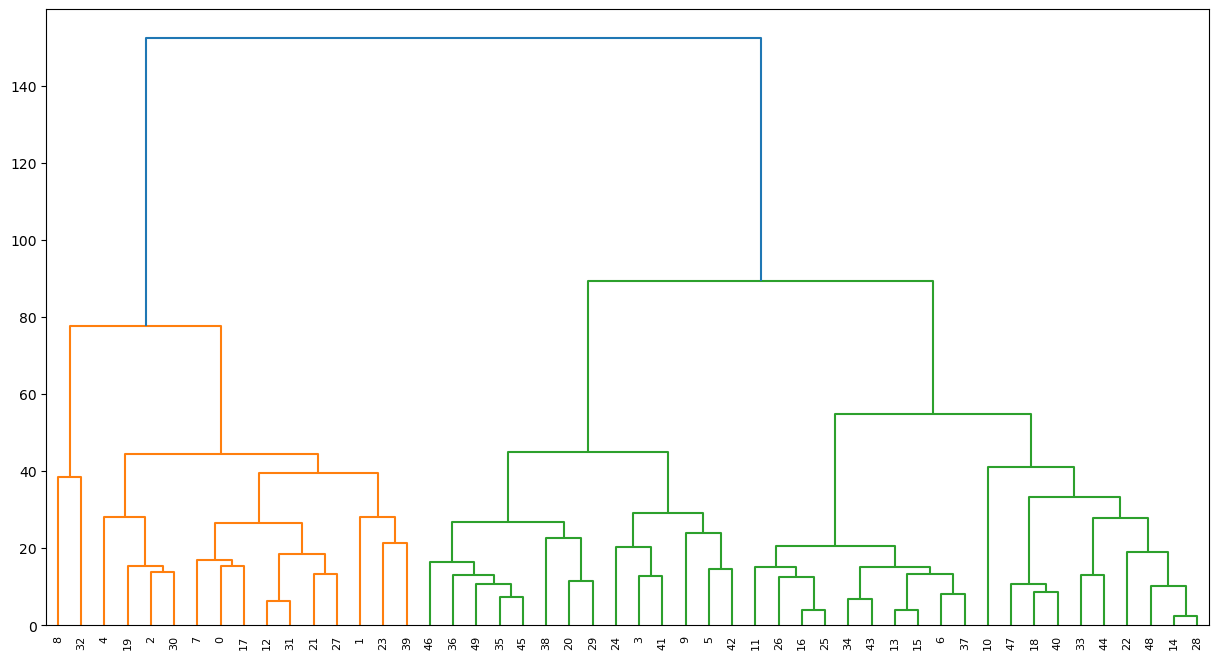

In [19]:
fig = plt.figure(figsize=(15,8))
dendrogram = sch.dendrogram(sch.linkage(crimes, method='average'))

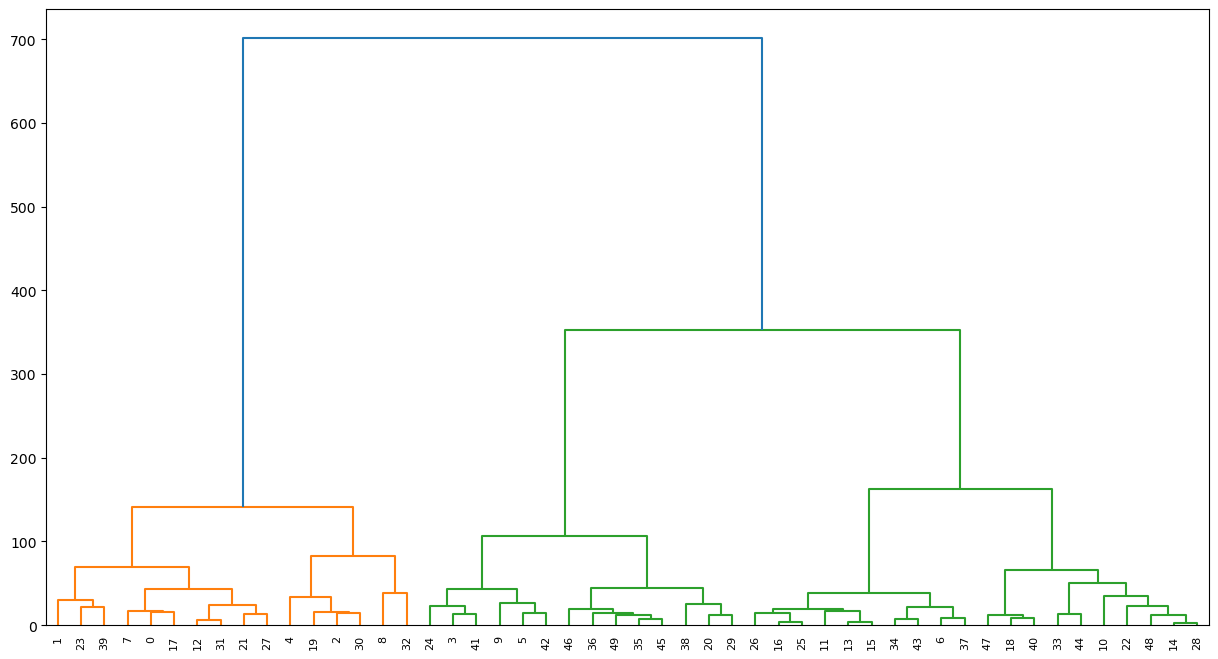

In [20]:
fig = plt.figure(figsize=(15,8))
dendrogram = sch.dendrogram(sch.linkage(crimes, method='ward'))

In [21]:
hc1 = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'average')

In [22]:
hc1

AgglomerativeClustering(linkage='average', n_clusters=4)

In [24]:
y2 = hc1.fit_predict(crimes)
cc = pd.DataFrame(y2,columns=['Clusters'])
cc.head()

,Clusters
0,1
1,1
2,1
3,2
4,1


In [25]:
crimes2 = pd.concat([crime,cc],axis=1)
crimes2.head(10)

,States,Murder,Assault,UrbanPop,Rape,Clusters
0,Alabama,13.2,236,58,21.2,1
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,2
4,California,9.0,276,91,40.6,1
5,Colorado,7.9,204,78,38.7,2
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,1
8,Florida,15.4,335,80,31.9,3
9,Georgia,17.4,211,60,25.8,2


In [26]:
crimes2.sort_values("Clusters").reset_index()

,index,States,Murder,Assault,UrbanPop,Rape,Clusters
0,18,Maine,2.1,83,51,7.8,0
1,40,South Dakota,3.8,86,45,12.8,0
2,34,Ohio,7.3,120,75,21.4,0
3,33,North Dakota,0.8,45,44,7.3,0
4,28,New Hampshire,2.1,57,56,9.5,0
5,26,Nebraska,4.3,102,62,16.5,0
6,25,Montana,6.0,109,53,16.4,0
7,48,Wisconsin,2.6,53,66,10.8,0
8,22,Minnesota,2.7,72,66,14.9,0
9,43,Utah,3.2,120,80,22.9,0


In [27]:
crimes2['Clusters'].value_counts()

0    20
1    14
2    14
3     2
Name: Clusters, dtype: int64

K Means clustering

In [29]:
kmeans = KMeans(n_clusters=4,random_state=0)
kmeans.fit(crimes)

KMeans(n_clusters=4, random_state=0)

In [30]:
kmeans.inertia_

34728.629357142854

In [31]:
wcss = []
for i in range(1, 8):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(crimes)
    wcss.append(kmeans.inertia_)

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [32]:
wcss

[355807.8216,
 96399.02814449919,
 47964.26535714285,
 34728.629357142854,
 24417.02352380952,
 18768.00066666667,
 15463.473777777777]

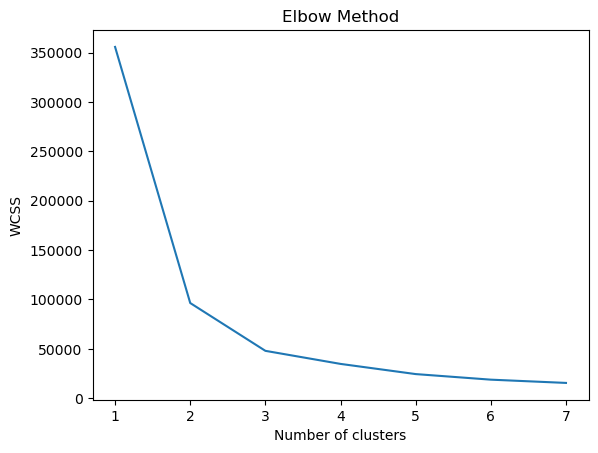

In [33]:
plt.plot(range(1, 8), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
building cluster algorithm

In [34]:
cc2 = KMeans(4, random_state=8)
cc2.fit(crimes)

KMeans(n_clusters=4, random_state=8)

In [36]:
KMeans(n_clusters=4, random_state=6)

KMeans(n_clusters=4, random_state=6)

In [37]:
cc2.labels_

array([2, 2, 2, 0, 2, 0, 3, 2, 2, 0, 1, 3, 2, 3, 1, 3, 3, 2, 1, 2, 0, 2,
       1, 2, 0, 3, 3, 2, 1, 0, 2, 2, 2, 1, 3, 0, 0, 3, 0, 2, 1, 0, 0, 3,
       1, 0, 0, 1, 1, 0])

In [40]:
df2 = pd.DataFrame(cc2.labels_, columns =['clusters'])

In [41]:
df2

,clusters
0,2
1,2
2,2
3,0
4,2
5,0
6,3
7,2
8,2
9,0


In [42]:
crimes3 = pd.concat([crime,df2], axis=1)
crimes3.head(4)

,States,Murder,Assault,UrbanPop,Rape,clusters
0,Alabama,13.2,236,58,21.2,2
1,Alaska,10.0,263,48,44.5,2
2,Arizona,8.1,294,80,31.0,2
3,Arkansas,8.8,190,50,19.5,0


In [43]:
crimes3['clusters'].value_counts()

2    16
0    14
3    10
1    10
Name: clusters, dtype: int64

In [44]:
crimes3.groupby('clusters').agg(['mean'])

C:\Users\Dell\AppData\Local\Temp\ipykernel_18884\1173982413.py:1: FutureWarning: ['States'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  crimes3.groupby('clusters').agg(['mean'])


,Murder,Assault,UrbanPop,Rape
,mean,mean,mean,mean
clusters,,,,
0,8.214286,173.285714,70.642857,22.842857
1,2.950000,62.700000,53.900000,11.510000
2,11.812500,272.562500,68.312500,28.375000
3,5.590000,112.400000,65.600000,17.270000


DBSCAN

In [45]:
array = crimes.values

In [46]:
array

array([[ 13.2, 236. ,  58. ,  21.2],
       [ 10. , 263. ,  48. ,  44.5],
       [  8.1, 294. ,  80. ,  31. ],
       [  8.8, 190. ,  50. ,  19.5],
       [  9. , 276. ,  91. ,  40.6],
       [  7.9, 204. ,  78. ,  38.7],
       [  3.3, 110. ,  77. ,  11.1],
       [  5.9, 238. ,  72. ,  15.8],
       [ 15.4, 335. ,  80. ,  31.9],
       [ 17.4, 211. ,  60. ,  25.8],
       [  5.3,  46. ,  83. ,  20.2],
       [  2.6, 120. ,  54. ,  14.2],
       [ 10.4, 249. ,  83. ,  24. ],
       [  7.2, 113. ,  65. ,  21. ],
       [  2.2,  56. ,  57. ,  11.3],
       [  6. , 115. ,  66. ,  18. ],
       [  9.7, 109. ,  52. ,  16.3],
       [ 15.4, 249. ,  66. ,  22.2],
       [  2.1,  83. ,  51. ,   7.8],
       [ 11.3, 300. ,  67. ,  27.8],
       [  4.4, 149. ,  85. ,  16.3],
       [ 12.1, 255. ,  74. ,  35.1],
       [  2.7,  72. ,  66. ,  14.9],
       [ 16.1, 259. ,  44. ,  17.1],
       [  9. , 178. ,  70. ,  28.2],
       [  6. , 109. ,  53. ,  16.4],
       [  4.3, 102. ,  62. ,  16.5],
 

In [47]:
stscaler = StandardScaler().fit(array)
X2 = stscaler.transform(array)

In [48]:
X2

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [49]:
dbscan2 = DBSCAN(eps=0.98, min_samples=3)
dbscan2.fit(X2)

DBSCAN(eps=0.98, min_samples=3)

In [50]:
dbscan2.labels_

array([ 0, -1, -1, -1, -1, -1,  1, -1, -1,  0, -1,  1,  2,  1,  1,  1,  1,
        0,  1,  3,  1,  3,  1,  0, -1,  1,  1, -1,  1,  1,  3,  2, -1,  1,
        1,  1,  1,  1,  1,  0,  1,  0,  2,  1, -1,  1,  1,  1,  1,  1],
      dtype=int64)

In [51]:
c2 = pd.DataFrame(dbscan2.labels_,columns=['Cluster ID'])
c2.value_counts()

Cluster ID
 1            26
-1            12
 0             6
 2             3
 3             3
dtype: int64

In [52]:
crimes4 = pd.concat([crime,c2],axis=1)
crimes4

,States,Murder,Assault,UrbanPop,Rape,Cluster ID
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,-1
2,Arizona,8.1,294,80,31.0,-1
3,Arkansas,8.8,190,50,19.5,-1
4,California,9.0,276,91,40.6,-1
5,Colorado,7.9,204,78,38.7,-1
6,Connecticut,3.3,110,77,11.1,1
7,Delaware,5.9,238,72,15.8,-1
8,Florida,15.4,335,80,31.9,-1
9,Georgia,17.4,211,60,25.8,0
